In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go


from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,MinMaxScaler

from sklearn.cluster import KMeans

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder

from catboost import CatBoostRegressor

from scipy import stats

sns.set_style("whitegrid")

In [69]:
df = pd.read_csv("Clean_Dataset.csv",index_col=0)
print("There are {} observations for {} predictors.".format(df.shape[0],df.shape[1]))
df.head()

There are 300153 observations for 11 predictors.


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [70]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

There are no missing(null) values.

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


In [73]:
df.describe(include='all')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


In [74]:
df['source_city'].value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

In [75]:
df['destination_city'].value_counts()

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

In [76]:
df['stops'].value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

In [77]:
df['flight'].value_counts()

UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: flight, Length: 1561, dtype: int64

Data Visualization Questions

[Text(0.5, 1.0, 'airline count based on class')]

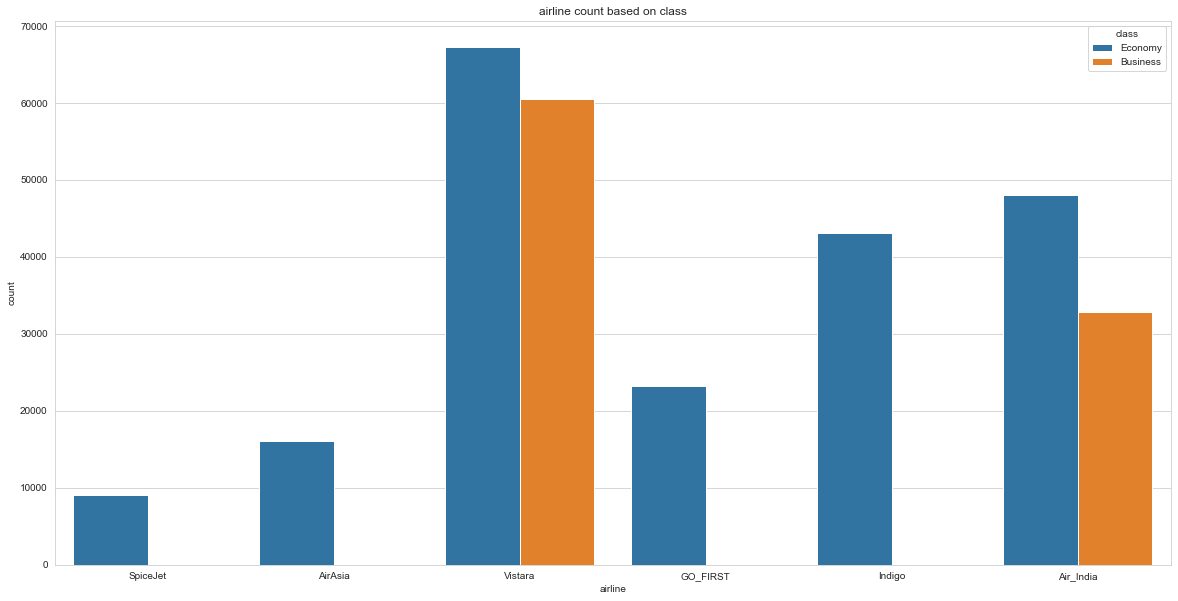

In [78]:
plt.figure(figsize=(20, 10))
sns.countplot(x='airline',hue='class' ,data= df ).set(title='airline count based on class')

[Text(0.5, 1.0, 'Source city count based on stops')]

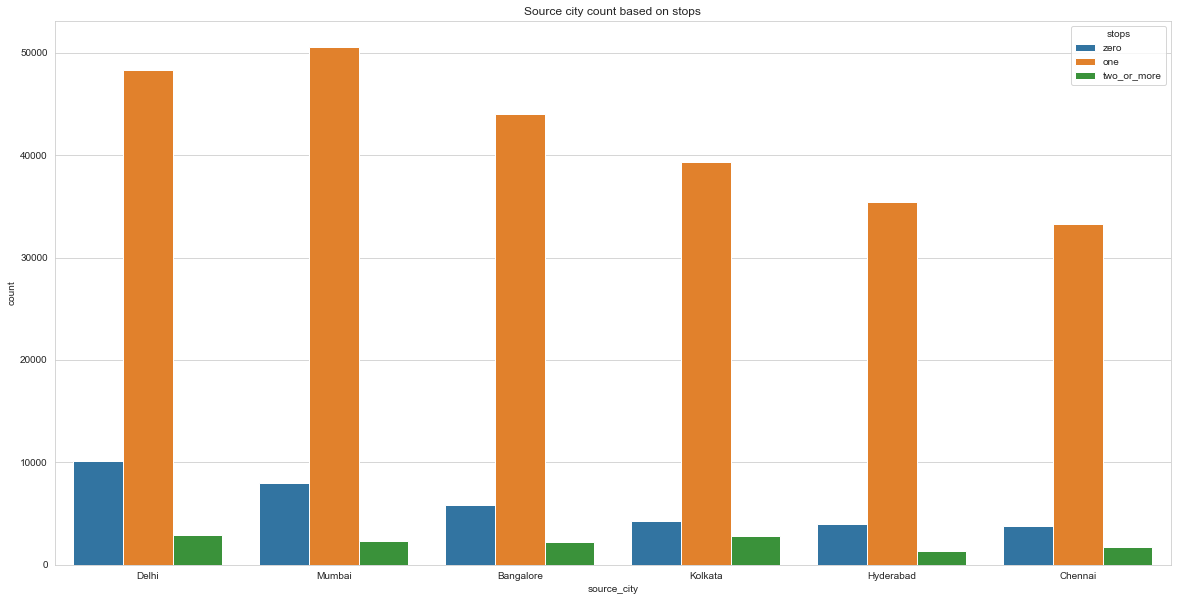

In [79]:
plt.figure(figsize=(20, 10))
sns.countplot(x='source_city',hue='stops',data=df).set(title='Source city count based on stops')

[Text(0.5, 1.0, 'Destination city count based on stops')]

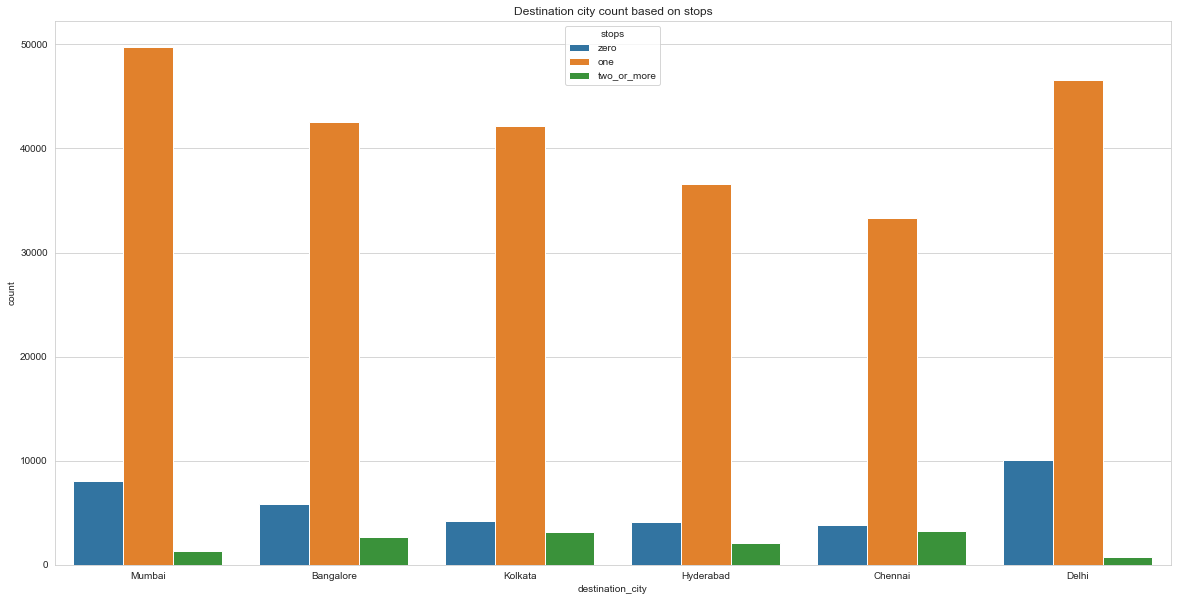

In [80]:
plt.figure(figsize=(20, 10))
sns.countplot(x='destination_city',hue='stops',data=df).set(title='Destination city count based on stops')

[Text(0.5, 1.0, 'Arrival time count based on stops')]

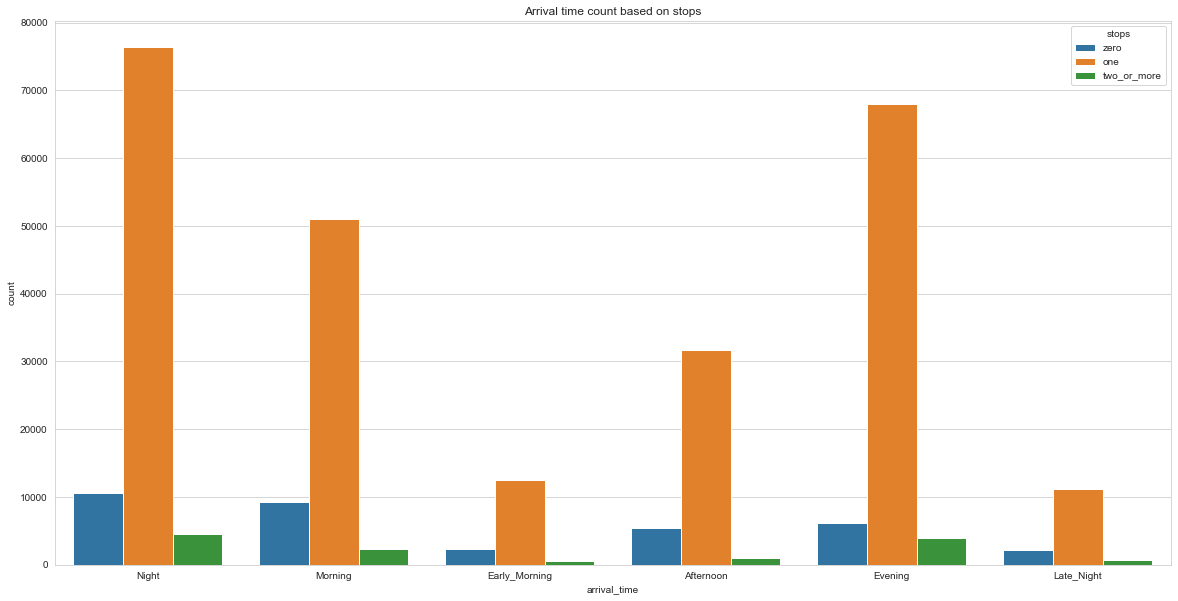

In [81]:
plt.figure(figsize=(20, 10))
sns.countplot(x='arrival_time',hue='stops',data=df).set(title='Arrival time count based on stops')

[Text(0.5, 1.0, 'Departure time count based on stops')]

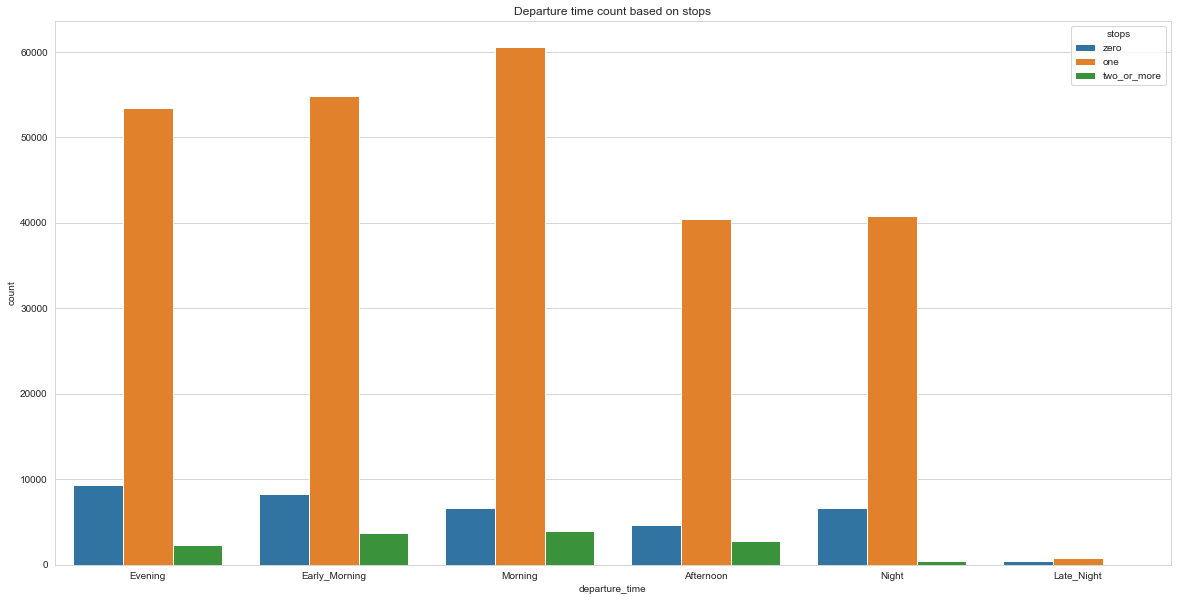

In [82]:
plt.figure(figsize=(20, 10))
sns.countplot(x='departure_time',hue='stops',data=df).set(title='Departure time count based on stops')

Most of the flights with one stop happened during night on the arrival time and morning on the departure time.

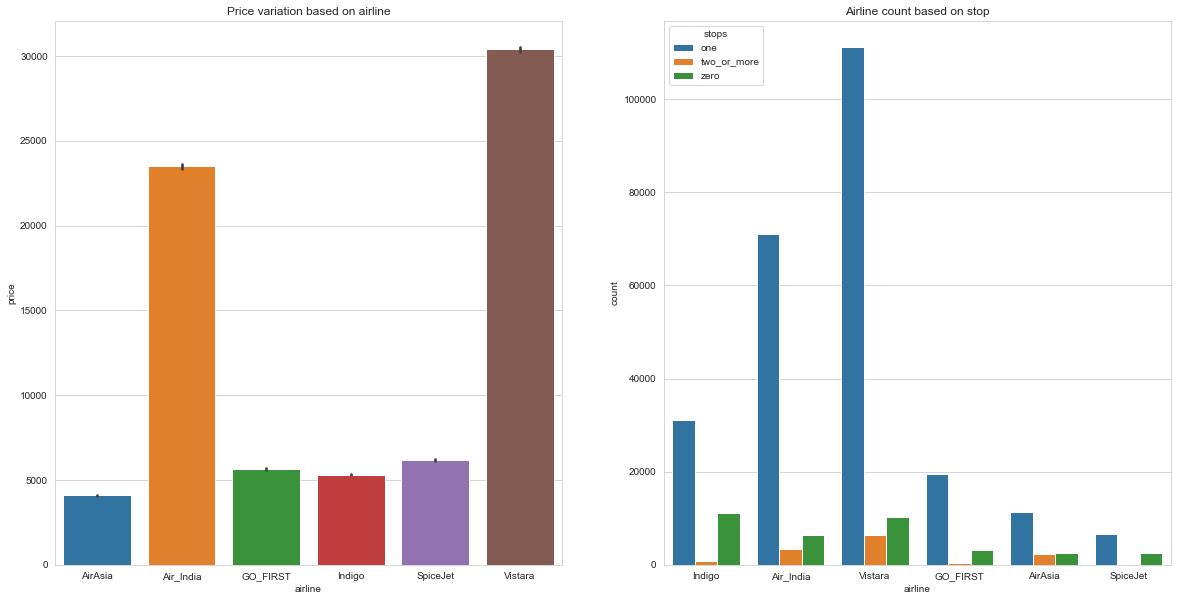

In [83]:
fig, axes = plt.subplots(1,2, figsize=(20,10))
sns.barplot(x='airline', y='price', data=df.sort_values('airline', axis=0), ax=axes[0])
axes[0].set(title='Price variation based on airline')

sns.countplot(x='airline',hue='stops', data=df.sort_values('stops', axis=0), ax=axes[1])
axes[1].set(title='Airline count based on stop');

The one stop condition is the most common one according to the graphs and the highest price.

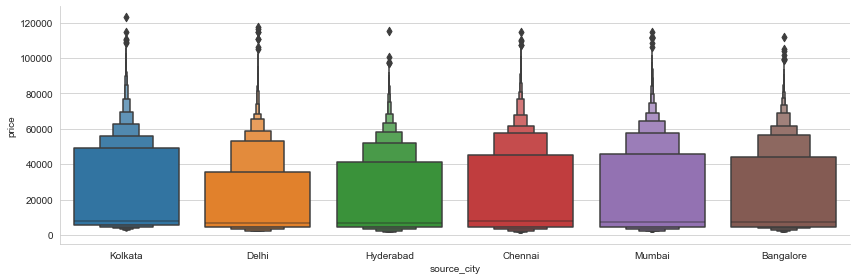

In [84]:
# Source vs Price

sns.catplot(y = "price", x = "source_city", data = df.sort_values("price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

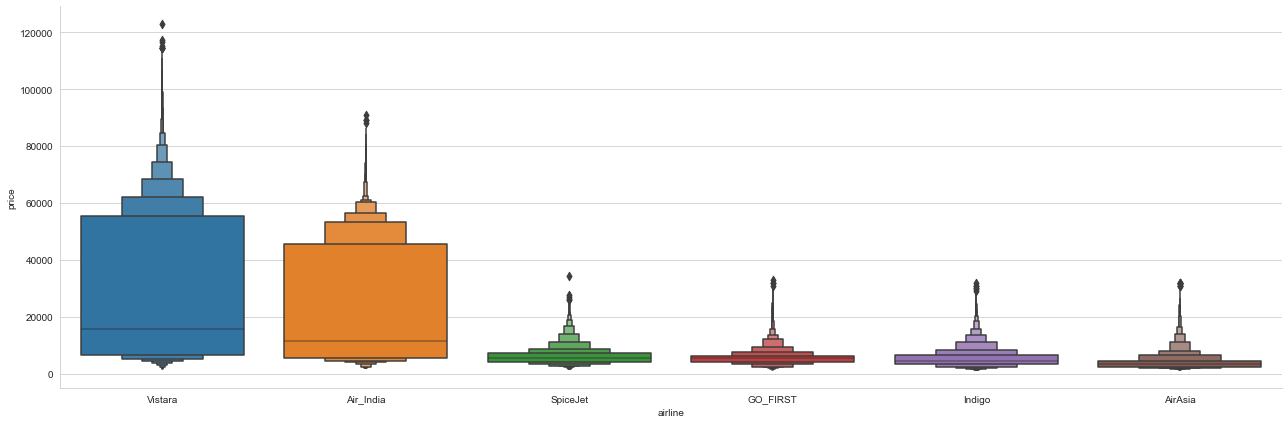

In [85]:
# Airline vs Price
sns.catplot(y = "price", x = "airline", data = df.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

Since we have business classes of Vistara and Air India in the dataset, their prices are very high. From graph we can see that Jet Vistara have the highest price. Among the only economy classes, apart from the first Airline, almost all are having similar median.

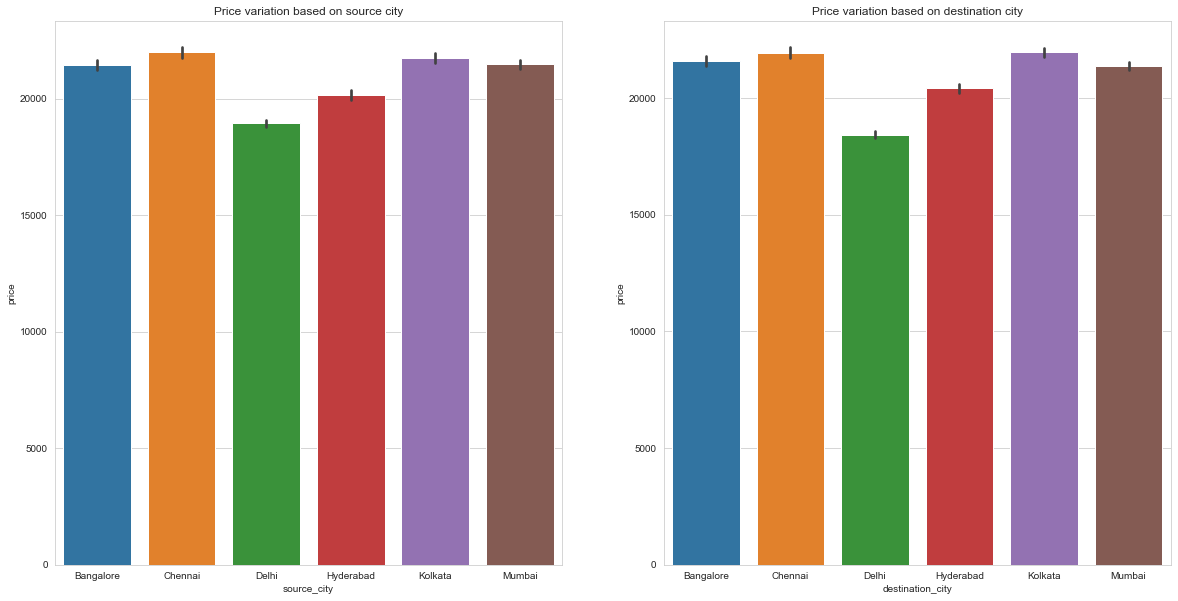

In [86]:
fig, axes = plt.subplots(1,2, figsize=(20,10))
sns.barplot(x='source_city', y='price', data=df.sort_values('source_city', axis=0), ax=axes[0])
axes[0].set(title='Price variation based on source city')

sns.barplot(x='destination_city', y='price', data=df.sort_values('destination_city', axis=0), ax=axes[1])
axes[1].set(title='Price variation based on destination city');

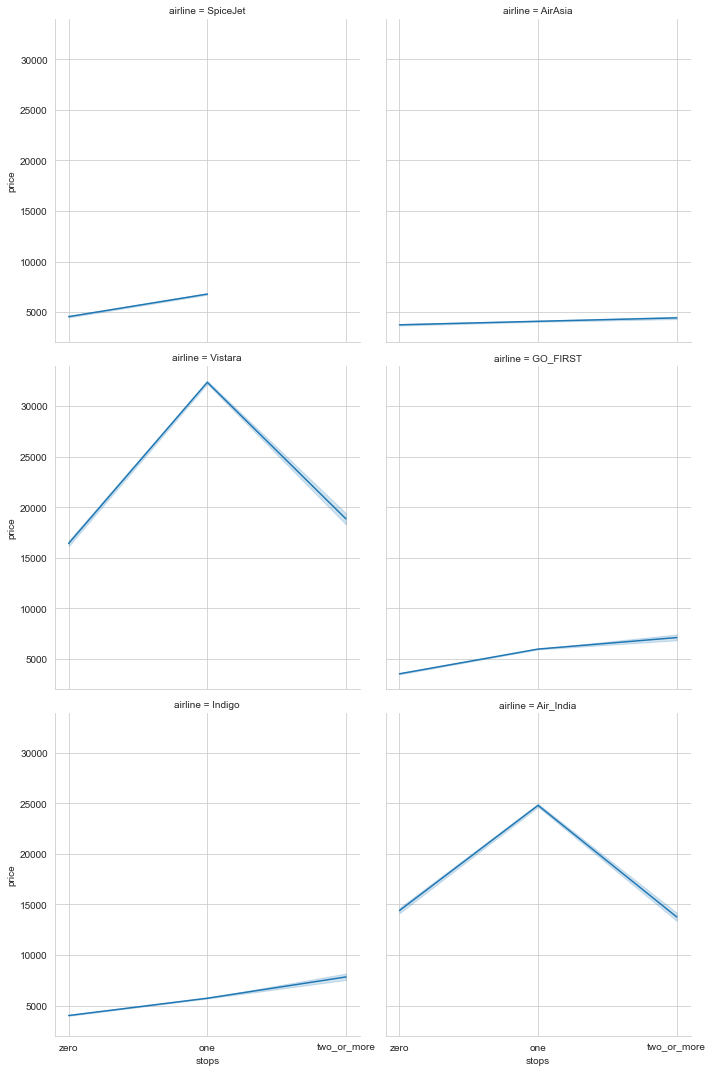

In [87]:
sns.relplot(col="airline", y="price", kind="line",x='stops', data=df, col_wrap=2)

This explains a little bit about why Vistara and Air India are the most expensive airlines, as we can see the one-stop condition is the highest price among the others.

<AxesSubplot:xlabel='price'>

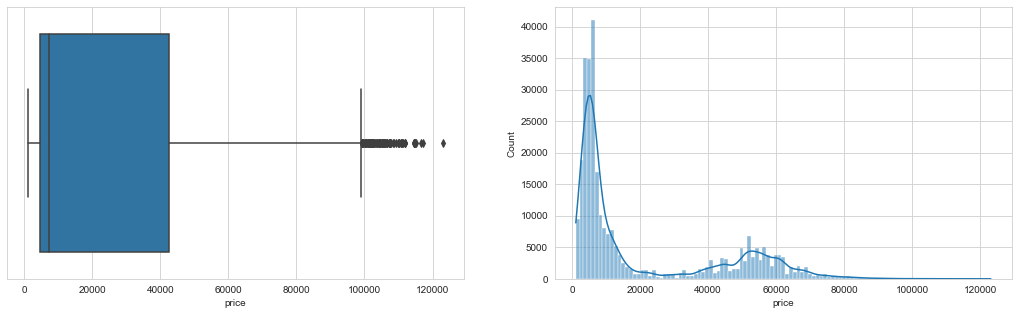

In [88]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,2)
sns.histplot(x = 'price', data = df, kde = True)
plt.subplot(1,2,1)
sns.boxplot(x = 'price', data = df)

Even though the mean is around 20000, we can see here that the median is approximately 7500. This difference is explainable by the presence of two different tickets: business and economy. On the second graph, we can see that the dispersion seems to be composed by two gaussian curves.

How does the ticket price vary between Economy and Business class?

To visualize the difference between the two kind of tickets, I will plot the prices for the two prices for both business and economy tickets for the different companies.

Text(0.5, 1.0, 'Airline prices based on the class and company')

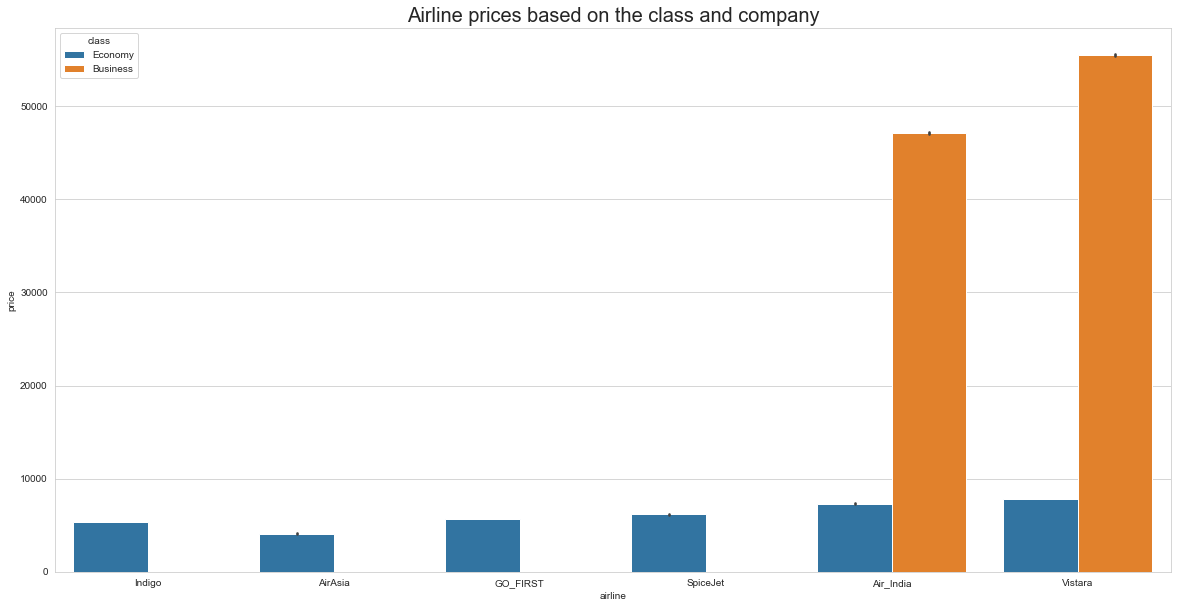

In [89]:
plt.figure(figsize=(20, 10))
sns.barplot(x='airline',y='price',hue="class",data=df.sort_values("price")).set_title('Airline prices based on the class and company',fontsize=20)

Business flights are only available in two companies: Air India and Vistara. Also, there is a big gap between the prices in the two class that reaches almost 5 times the price of Economy for Business tickets.

Does price vary with Airlines?


To compare the prices between the companies we will only compare the same kind of tickets since the previous question showed that the class has a big impact on the final price.

Text(0.5, 1.0, 'Airline prices based on companies for business tickets')

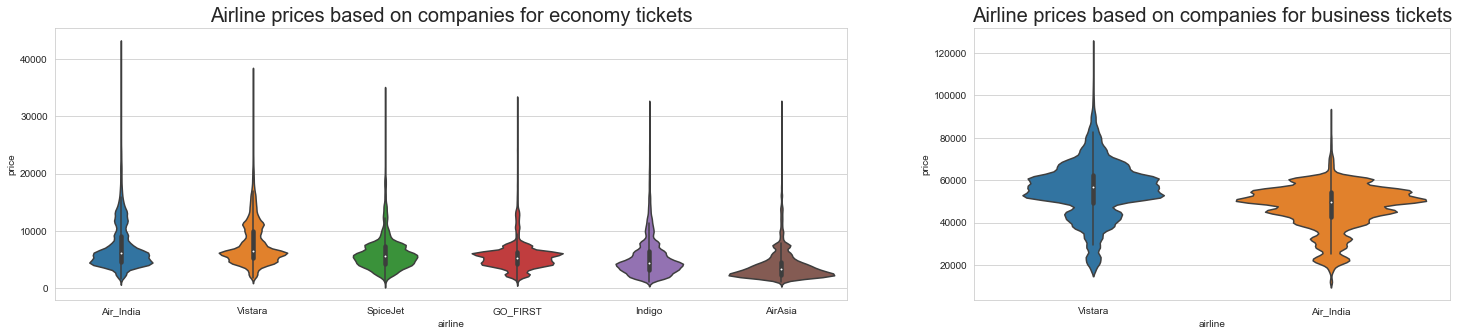

In [90]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.violinplot(y = "price", x = "airline",data = df.loc[df["class"]=='Economy'].sort_values("price", ascending = False), kind="boxen", ax=axs[0])
axs[0].set_title("Airline prices based on companies for economy tickets",fontsize=20)
sns.violinplot(y = "price", x = "airline",data = df.loc[df["class"]=='Business'].sort_values("price", ascending = False), kind="boxen", ax=axs[1])
axs[1].set_title("Airline prices based on companies for business tickets",fontsize=20)

There are slight differences between each companies on this graph, AirAsia seems to have the cheapest flights when Air India and Vistara are more expensive. However it looks like Vistara's business tickets are a little more expensive than the Air India's ones.

How is the price affected when tickets are bought in just 1 or 2 days before departure?

To visualize how the prices changes depending on the number of days left, I will calculate the average price depending on the days left, to try to understand a pattern in the curve.

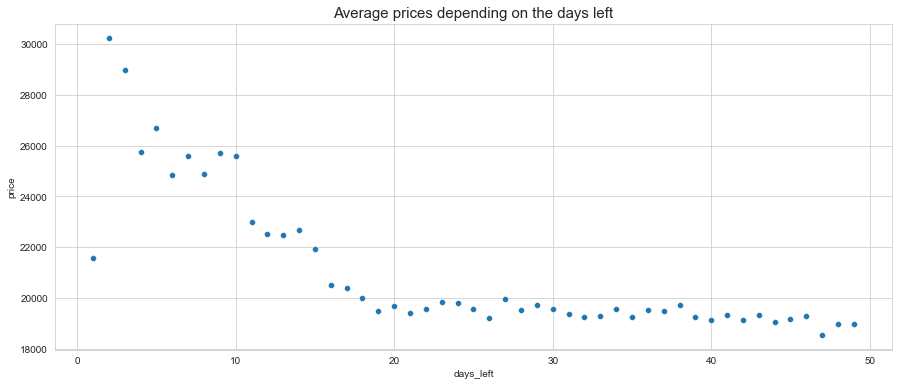

In [91]:
df_temp = df.groupby(['days_left'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="days_left", y="price", data=df_temp).set_title("Average prices depending on the days left",fontsize=15)

It is possible to see two different curves on this graph, the first one, stable between 50 and 20 days before the flight, and a positive monotone curve between 20 and 2 days before.

<AxesSubplot:xlabel='days_left', ylabel='price'>

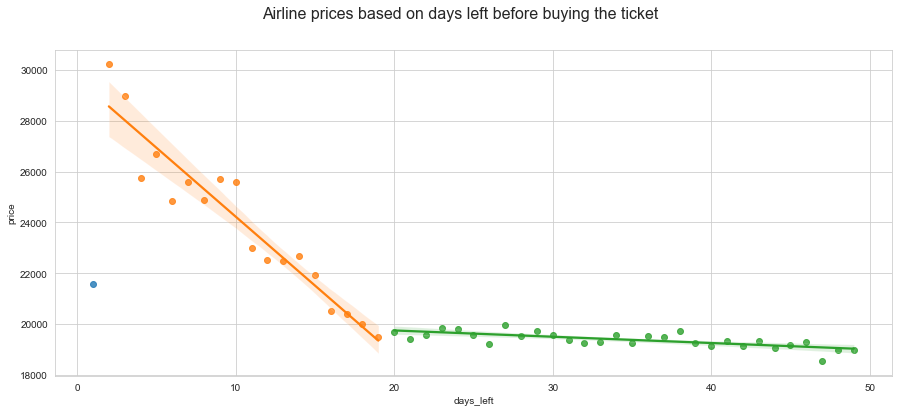

In [92]:
plt.figure(figsize=(15,6)).suptitle('Airline prices based on days left before buying the ticket', fontsize=16)
ax = plt.axes()
sns.regplot(x=df_temp.loc[df_temp["days_left"]==1].days_left, y=df_temp.loc[df_temp["days_left"]==1].price, fit_reg=False, ax=ax)
sns.regplot(x=df_temp.loc[(df_temp["days_left"]>1)&(df_temp["days_left"]<20)].days_left, y=df_temp.loc[(df_temp["days_left"]>1)&(df_temp["days_left"]<20)].price, fit_reg=True, ax=ax)
sns.regplot(x=df_temp.loc[df_temp["days_left"]>=20].days_left, y=df_temp.loc[df_temp["days_left"]>=20].price, fit_reg=True, ax=ax)

A pattern is clearly visible in the way prices evolve depending on the days left.

The graph highlights how the prices rise slowly and then drastically start rising 20 days before the flight, but fall just one day before the flight up to three times cheaper. This can be explain by the fact the companies want to fill their empty seats and thus lower the prices of the tickets to ensure the planes remains full.

Does the price change with the duration of the flight?

Let's see how the duration of the flight may affect the final price.

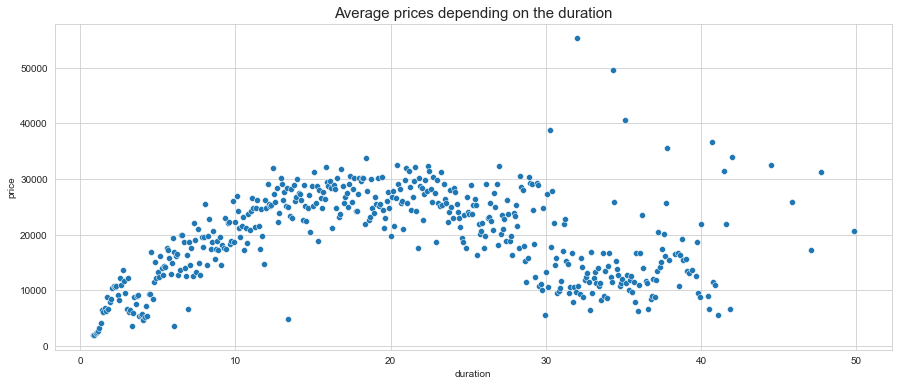

In [93]:
df_temp = df.groupby(['duration'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="duration", y="price", data=df_temp).set_title("Average prices depending on the duration",fontsize=15)

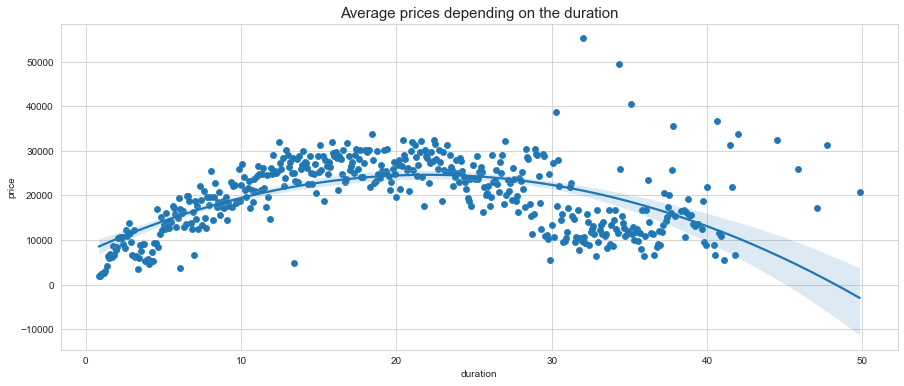

In [94]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="duration", y="price", data=df_temp).set_title("Average prices depending on the duration",fontsize=15)
ax = sns.regplot(x="duration", y="price", data=df_temp, order=2)

It is clear that here the relationship is not linear but can be approximated with a second degree curve. The prices reaches a high price at a duration of 20 hours before lowering again.

However some outliers seem to affect the regression curve .

Does ticket price change based on the departure time and arrival time?

Text(0.5, 1.0, 'Airline prices based on the arrival time')

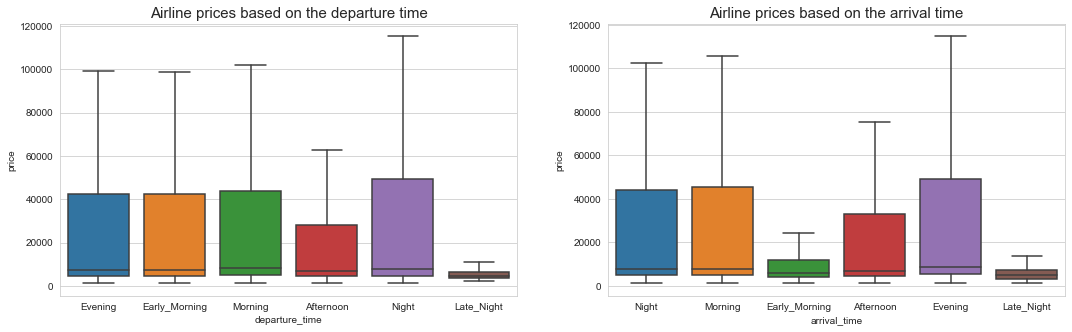

In [95]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, y="price", x="departure_time",showfliers=False).set_title("Airline prices based on the departure time",fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(data=df, y="price", x="arrival_time",showfliers=False).set_title("Airline prices based on the arrival time",fontsize=15)

As expected, leaving at night or arriving at night remains the cheapest way to travel. But it's also visible that arriving early morning is also cheap and afternoon flight are a bit cheaper that evening, morning and night flight.

How the price changes with change in Source and Destination?

To answer this question, I will visualize the different prices for all the destinations as a departure and arrival destination.

Text(0.5, 0.98, 'Airline prices based on the source and destination cities')

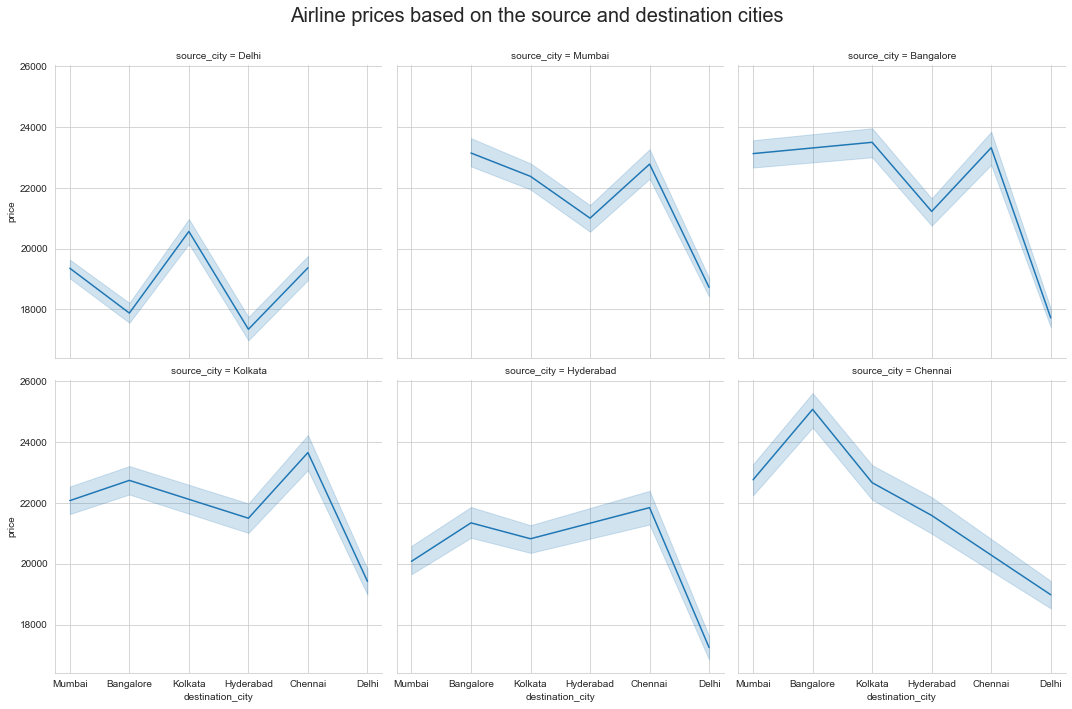

In [96]:
ax = sns.relplot(col="source_city", y="price", kind="line",x='destination_city', data=df, col_wrap=3)
ax.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
ax.fig.suptitle('Airline prices based on the source and destination cities',fontsize=20)

On one hand, it seems that flight leaving from Delhi are often cheaper that from other source cities and the capital is also the cheapest deatination to go probably because as a capital cities, the airport is the biggest and proposes more flights. In an other hand, the prices are more or less similar and Hyderabad being the most expensive destination.

Does the number of stops influences the price?

Let's see how the number of stop may influence the final price.

Text(0.5, 1.0, 'Airline prices based on the number of stops  for business')

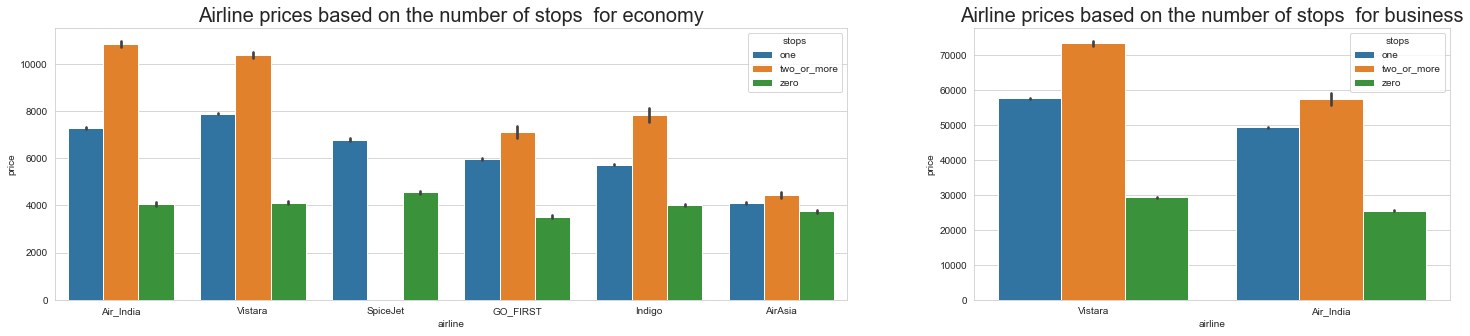

In [97]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Economy'].sort_values("price", ascending = False), ax=axs[0])
axs[0].set_title("Airline prices based on the number of stops  for economy",fontsize=20)
sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Business'].sort_values("price", ascending = False), ax=axs[1])
axs[1].set_title("Airline prices based on the number of stops  for business",fontsize=20)

 It's clear that the more stops there are the more expensive the flight is except for AirAsia where the prices seems more constant. The behaviour and different analysis of AirAsia tend to show that it relates to a low cost company.

What variables influence the prices most?

In [98]:
def preprocessing(df):
    #Encode the ordinal variables "stops" and "class".
    df["stops"] = df["stops"].replace({'zero':0,'one':1,'two_or_more':2}).astype(int)
    df["class"] = df["class"].replace({'Economy':0,'Business':1}).astype(int)
    
    #Create the dummy variables for the cities, the times and the airlines.
    dummies_variables = ["airline","source_city","destination_city","departure_time","arrival_time"]
    dummies = pd.get_dummies(df[dummies_variables], drop_first= True)
    df = pd.concat([df,dummies],axis=1)
    
    #Create the dummy variables for the cities, the times and the airlines.
    df = df.drop(["flight","airline","source_city","destination_city","departure_time","arrival_time"],axis=1)
    
    return df

In [99]:
df_preprocessed = preprocessing(df)

To visualize the linear importance of each variable on the target, we will plot a correlation matrix.

<AxesSubplot:>

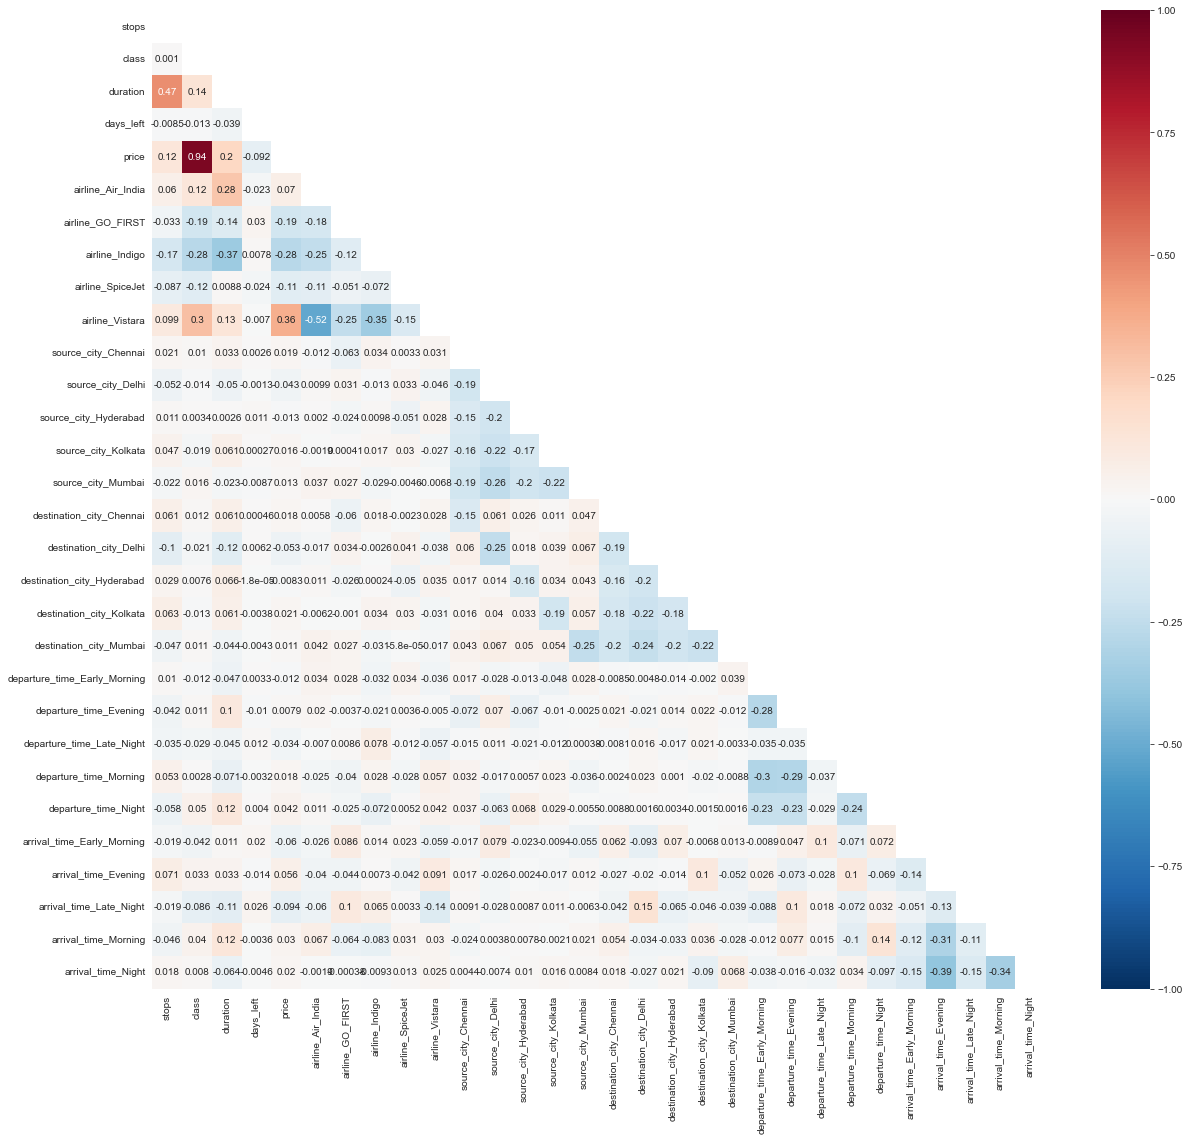

In [100]:
mask = np.triu(np.ones_like(df_preprocessed.corr(), dtype=bool))

plt.figure(figsize = (20,18))
sns.heatmap(df_preprocessed.corr(), data = df_preprocessed, mask=mask,annot = True, vmin= -1.0, vmax= 1.0, center = 0, cmap = 'RdBu_r')

However, the correlation is a good metric for linear relationship, but doesn't highlight non linear ones. For that I will use mutual information.

In [101]:
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


In [102]:
X = df_preprocessed.copy()
y = X.pop("price")

mi_scores = make_mi_scores(X, y)

In [103]:
print(mi_scores.sort_values(ascending=False))

duration                        2.416936
class                           0.618061
airline_Vistara                 0.516296
days_left                       0.477366
source_city_Delhi               0.431156
source_city_Mumbai              0.429834
airline_Air_India               0.403201
stops                           0.393255
destination_city_Delhi          0.387879
destination_city_Mumbai         0.382828
source_city_Kolkata             0.361059
source_city_Hyderabad           0.347045
destination_city_Kolkata        0.339032
source_city_Chennai             0.326053
destination_city_Hyderabad      0.321119
destination_city_Chennai        0.303286
airline_Indigo                  0.288444
airline_GO_FIRST                0.202520
arrival_time_Evening            0.126667
arrival_time_Night              0.107493
departure_time_Evening          0.104264
arrival_time_Morning            0.098781
departure_time_Morning          0.093396
departure_time_Early_Morning    0.086883
airline_SpiceJet

This importance analysis shows us the class or the fast that the flight is a Vistara one but vairables like the duration of the flight or the number of days left have strong non linear relationship too as we saw on the previous questions.

In [104]:
# As airline is Nominal Categorical data we will perform OneHotEncoding

airline = df[["airline"]]

airline = pd.get_dummies(airline, drop_first= True)

airline.head()

,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,0
3,0,0,0,0,1
4,0,0,0,0,1


In [105]:
# As source city is Nominal Categorical data we will perform OneHotEncoding

source = df[["source_city"]]
source = pd.get_dummies(source, drop_first= True)
source.head()

,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [106]:
# As departure time is Nominal Categorical data we will perform OneHotEncoding

departure = df[["departure_time"]]
departure = pd.get_dummies(departure, drop_first= True)
departure.head()

,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night
0,0,1,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [107]:
# As arrival time is Nominal Categorical data we will perform OneHotEncoding

arrival = df[["arrival_time"]]
arrival = pd.get_dummies(arrival, drop_first= True)
arrival.head()

,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,0,0,0,0,1
1,0,0,0,1,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,1,0


In [108]:
# As destination city is Nominal Categorical data we will perform OneHotEncoding

destination = df[["destination_city"]]
destination = pd.get_dummies(destination, drop_first= True)
destination.head()

,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [109]:
df.replace({"zero": 0, "one": 1, "two_or_more": 2}, inplace = True)

In [110]:
df.replace({"Economy": 0, "Business": 1}, inplace = True)

In [111]:
df2 = pd.concat([df, airline, source, departure, arrival, destination], axis = 1)

In [112]:
df2.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,0,2.17,1,...,0,0,0,0,1,0,0,0,0,1
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,...,0,0,0,1,0,0,0,0,0,1
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,...,1,0,0,0,0,0,0,0,0,1
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,...,0,0,0,0,0,0,0,0,0,1
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,...,0,0,0,1,0,0,0,0,0,1


In [113]:
df2.drop(["airline", "flight", 'source_city', "departure_time", 'arrival_time', 'destination_city'], axis = 1, inplace = True)

In [114]:
scaler = MinMaxScaler()
num_vars = ['duration', 'days_left']
df2[num_vars] = scaler.fit_transform(df2[num_vars])

In [115]:
df2.head()

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,0.027347,0.0,5953,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0.030612,0.0,5953,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0.027347,0.0,5956,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0.028980,0.0,5955,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.030612,0.0,5955,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [116]:
X = df2.drop(['price'], axis=1)
y = df2['price']

In [117]:
X

,stops,class,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,0.027347,0.0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0.030612,0.0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0.027347,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0.028980,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.030612,0.0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,0.188776,1.0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,1,0,0
300149,1,1,0.195714,1.0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,1,0,0
300150,1,1,0.265306,1.0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,1,0,0
300151,1,1,0.187143,1.0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,1,0,0


In [118]:
df2.describe()

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
count,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,...,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
mean,0.924312,0.311464,0.232470,0.520932,20889.660523,0.269503,0.077204,0.143660,0.030021,0.425979,...,0.051364,0.260944,0.046646,0.209010,0.304971,0.134491,0.191103,0.142347,0.165029,0.196890
std,0.398106,0.463093,0.146775,0.282521,22697.767366,0.443702,0.266915,0.350745,0.170646,0.494491,...,0.220739,0.439150,0.210880,0.406602,0.460396,0.341180,0.393170,0.349407,0.371207,0.397649
min,0.000000,0.000000,0.000000,0.000000,1105.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.122449,0.291667,4783.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.212653,0.520833,7425.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.313061,0.770833,42521.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,123071.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


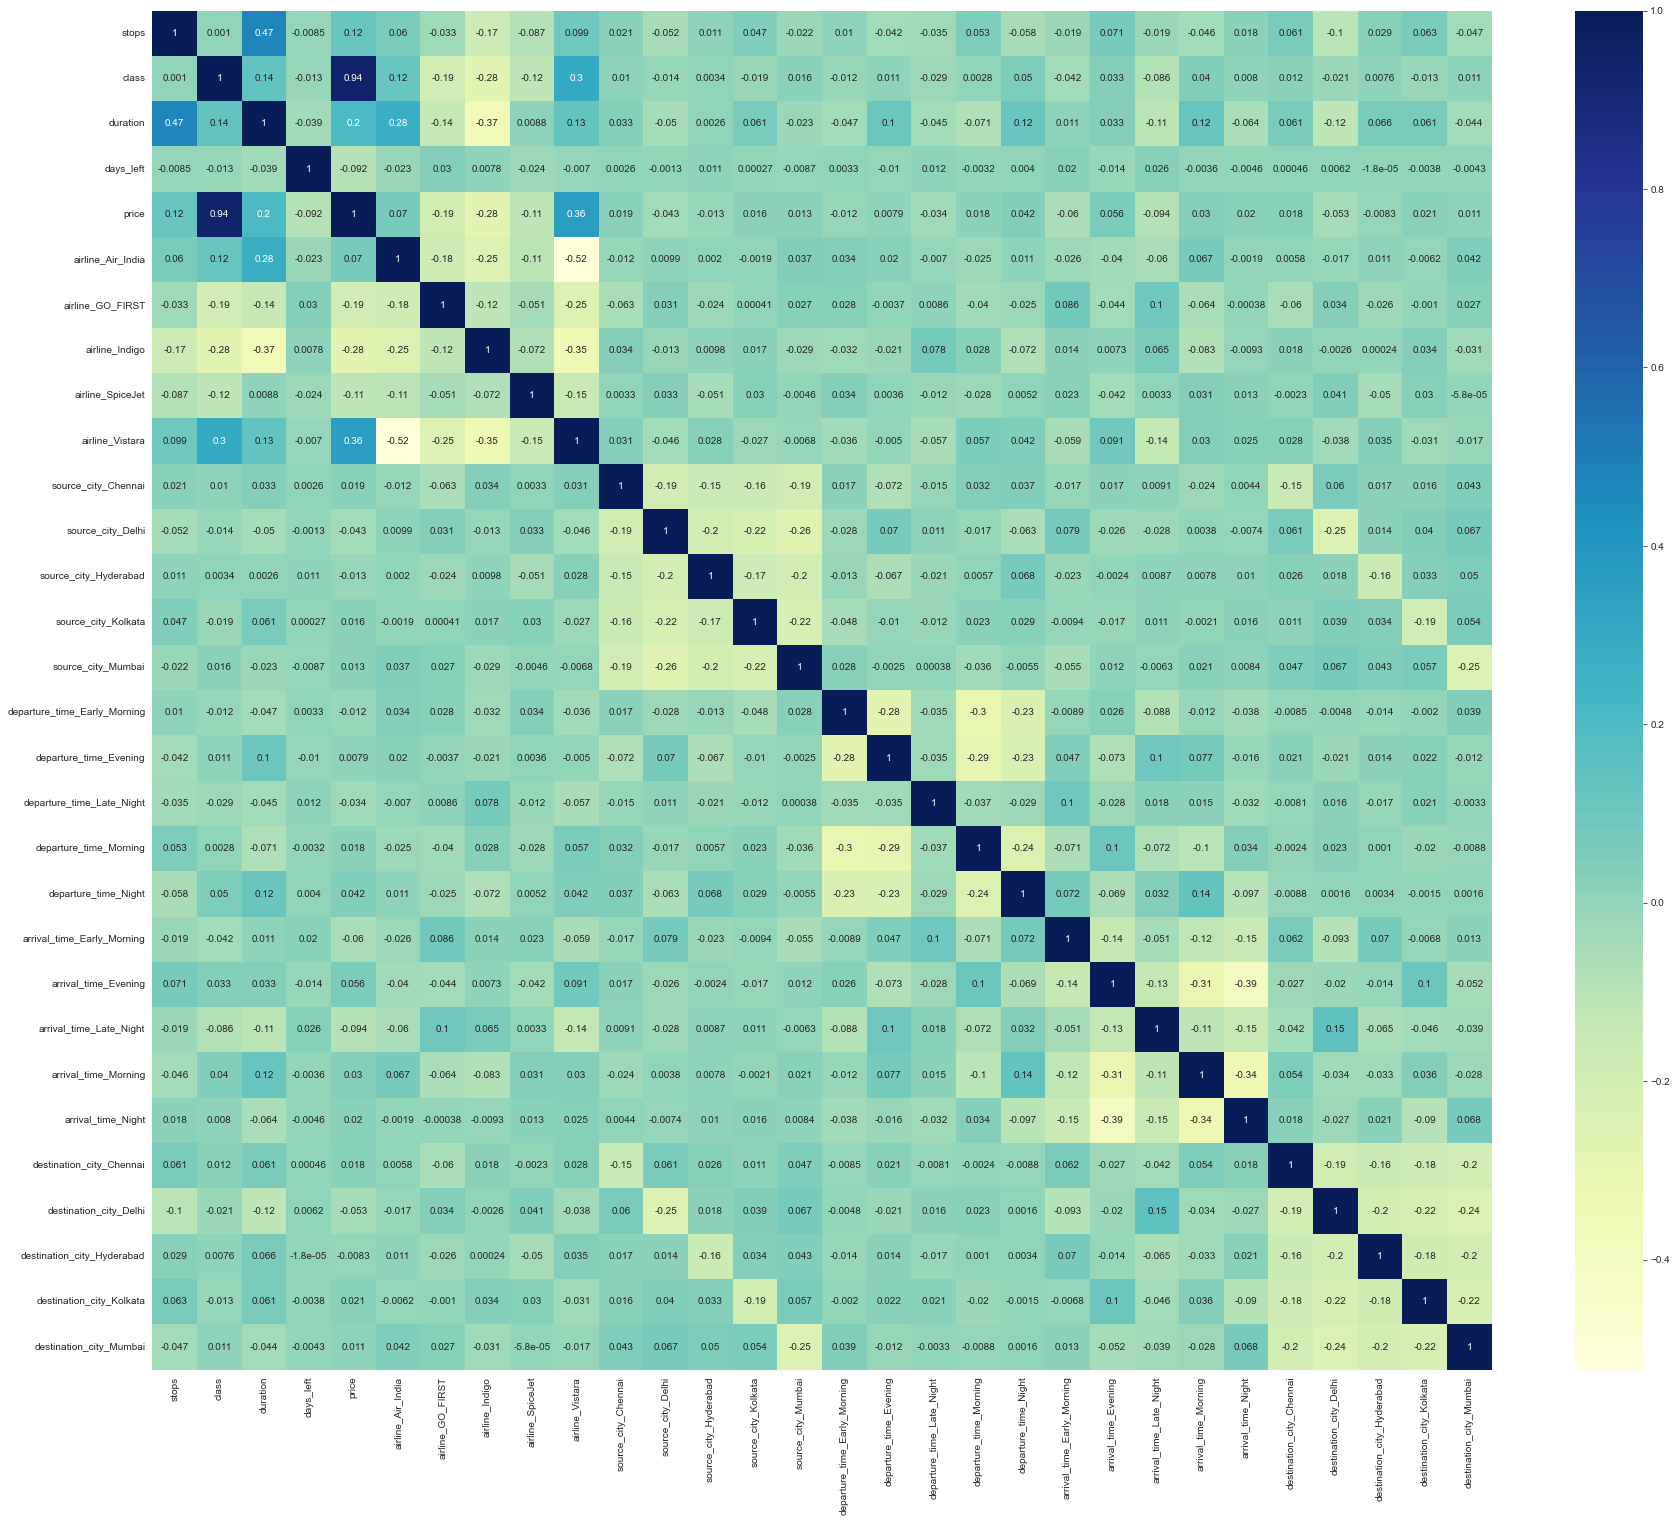

In [119]:
plt.figure(figsize = (30, 25))
sns.heatmap(df2.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [120]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [121]:
print(selection.feature_importances_)

[2.99094508e-02 8.80371658e-01 2.65838928e-02 1.87195238e-02
 4.80963743e-03 1.95809885e-04 1.77588040e-04 1.38880452e-04
 6.14000124e-03 1.03646041e-03 4.38269435e-03 1.49708891e-03
 2.09780886e-03 2.33929013e-03 1.07631042e-03 1.45950736e-03
 5.36519158e-05 1.35001780e-03 1.01464603e-03 9.34063921e-04
 1.52027823e-03 2.24829961e-04 1.06489787e-03 1.72847020e-03
 1.03289059e-03 4.11623156e-03 1.94317648e-03 1.98609132e-03
 2.09515129e-03]


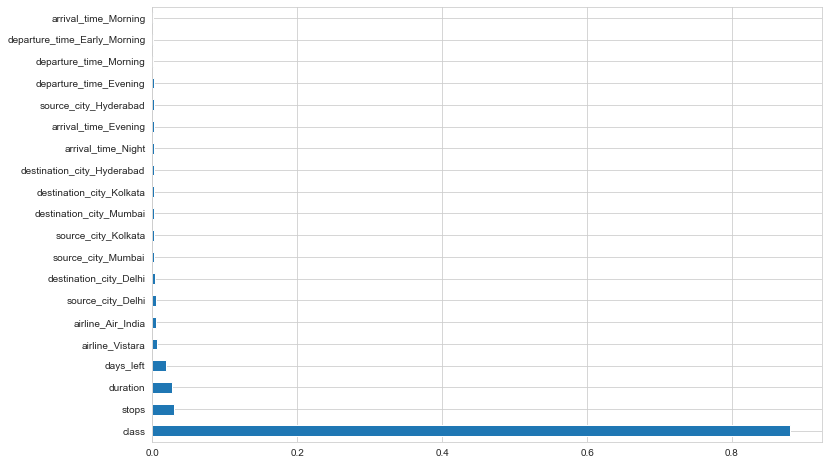

In [122]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [123]:
X = df2[['class', 'stops', 'duration', 'days_left']]
y = df2['price']

In [124]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state= 42)

Modeling

Linear Regression Model

In [125]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(y_pred)

[ 5788.13701481 50637.56023361  5041.43241228 ...  6937.69883363
 -1579.62770685 56749.66898956]


In [126]:
print("R2 Score: ",r2_score(y_test,y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.900148779746354
Mean Squared Error:  51471534.03497574
Mean Absolute Error: 4595.674349879719
Root Mean Squared Error: 7174.366455302917


Gradient Boosting Regressor

In [127]:
from sklearn.ensemble import GradientBoostingRegressor

gbre = GradientBoostingRegressor()
gbre.fit(X_train, y_train)
y_pred = gbre.predict(X_test)
print(y_pred)

[ 5568.0216066  56278.18372987  5151.52723864 ...  5504.15158835
  2606.86657897 59598.82972206]


In [128]:
print("R2 Score: ",r2_score(y_test,y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.9346405250938503
Mean Squared Error:  33691650.72388971
Mean Absolute Error: 3407.880731568537
Root Mean Squared Error: 5804.450940777233


Random Forest Regressor

In [129]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print(y_pred)

[ 5116.8484881  62723.67434058  5068.91579972 ...  5753.6537979
  2769.12698609 79722.96804762]


In [130]:
print("R2 Score: ",r2_score(y_test,y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.9234460047894502
Mean Squared Error:  39462227.5019148
Mean Absolute Error: 3673.2494287715817
Root Mean Squared Error: 6281.896807646142


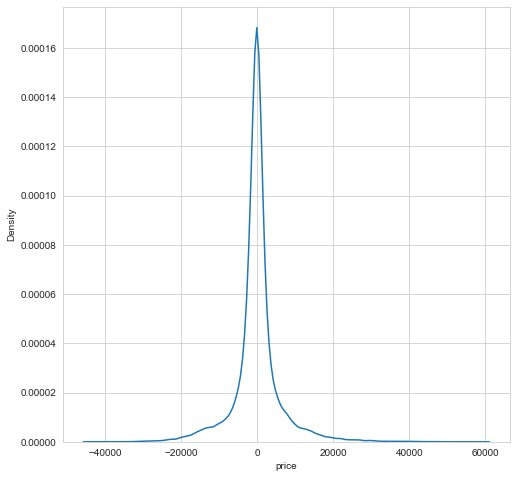

In [134]:
plt.figure(figsize = (8,8))
sns.kdeplot(y_test-y_pred)
plt.show()

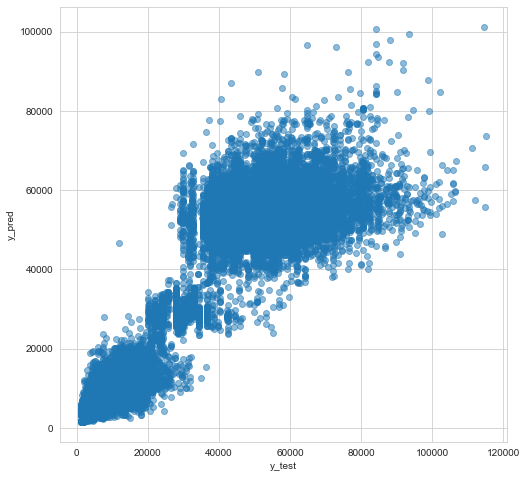

In [131]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

Saving the model

In [133]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(regr, file)

# model=open('flight_rf.pkl', 'rb')
# flight_price = pickle.load(model)

Conclusion of the project

1. The model that gives the best result is the Random Forest Regressor on the test dataset with an R^2 score equals to 0.934 and a MAE score equals to 3407.

2. There is a big gap between flight tickets in business and economy. In average business tickets are 6.5 times more expensive than economy tickets.

3. Vistara and AirIndia seems to be the most expensive companies and AirAsia the cheapest. However for business tickets, only Vistara and AirIndia are available, and Vistara is slightly more expensive.

4. In general, prices rise quite slowly until 20 days before the flight where the prices rise drastically. But one day before the flight, there usually are empty seats that have not been sold. Thus it is possible to find tickets three times cheaper than the day before.

5. The longer the flight is the more expensive the tickets are until it reaches around 20 hours, then the prices tend to decrease.

6. For the time of the flight:

It seems that departure during the afternoon and late night are cheaper, and night more expensive. It seems that departure during the early morning, afternoon and late night are cheaper, and evening more expensive.

7. For the cities of the trip:

Flights from Delhi are the cheapest the from the others cities seems equal on average but slightly more expensive for Chennai. Flight to Delhi are the cheapest and to Bangalore the most expensive ones.

8. In general, the more stops there are, the more expensive the flight ticket is.